Importing the Dependencies

In [32]:
import pyforest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score,cross_validate
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

#model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

Data collection

In [2]:
df = pd.read_csv("diabetes - DS.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Exploratory Data Analysis

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Finding missing values and data type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum() #Missing values were replaced by 0

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#Missing values were replaced by 0 therefore replace the 0 value with the NAN 
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(df_copy.isnull().sum())

<IPython.core.display.Javascript object>

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df_copy.describe().T #Tranpose

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Data visualization

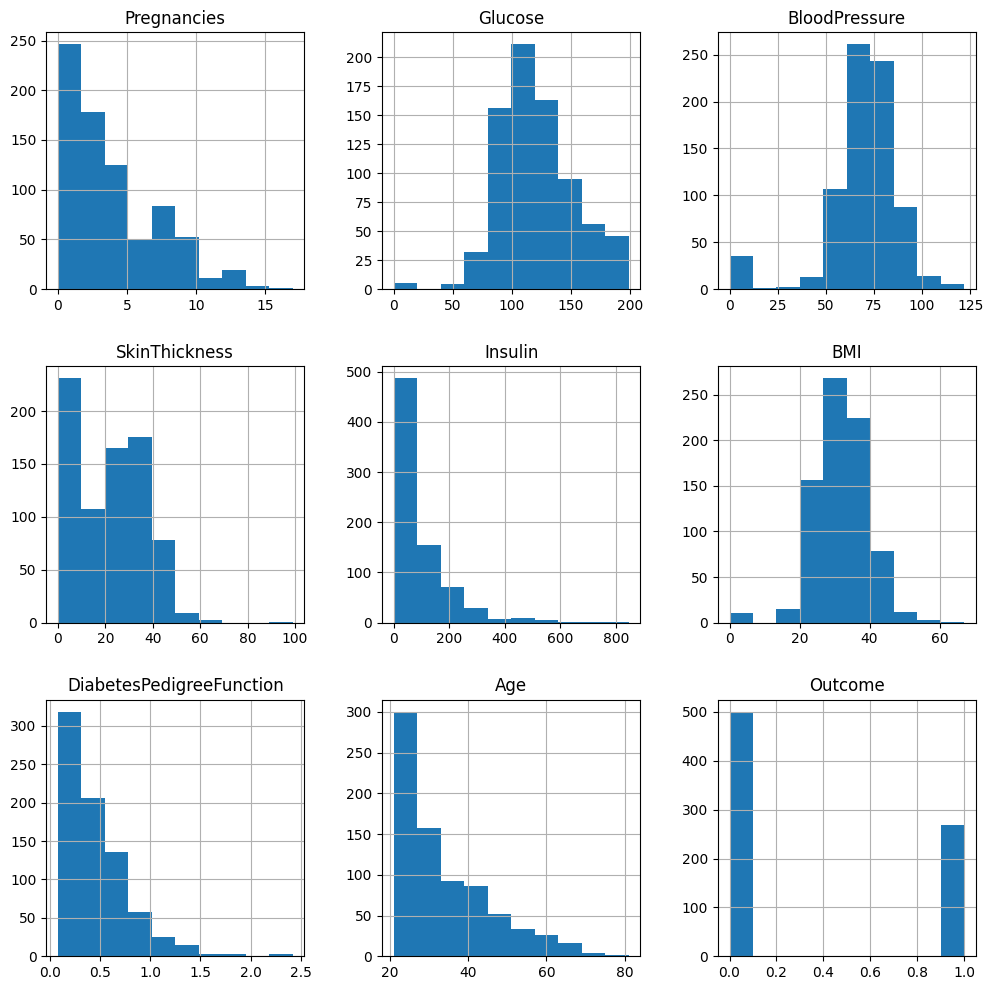

In [9]:
# before removing null values
plot = df.hist(figsize=(12,12))

Imputing the mean or median of the column to each missing value.

In [10]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

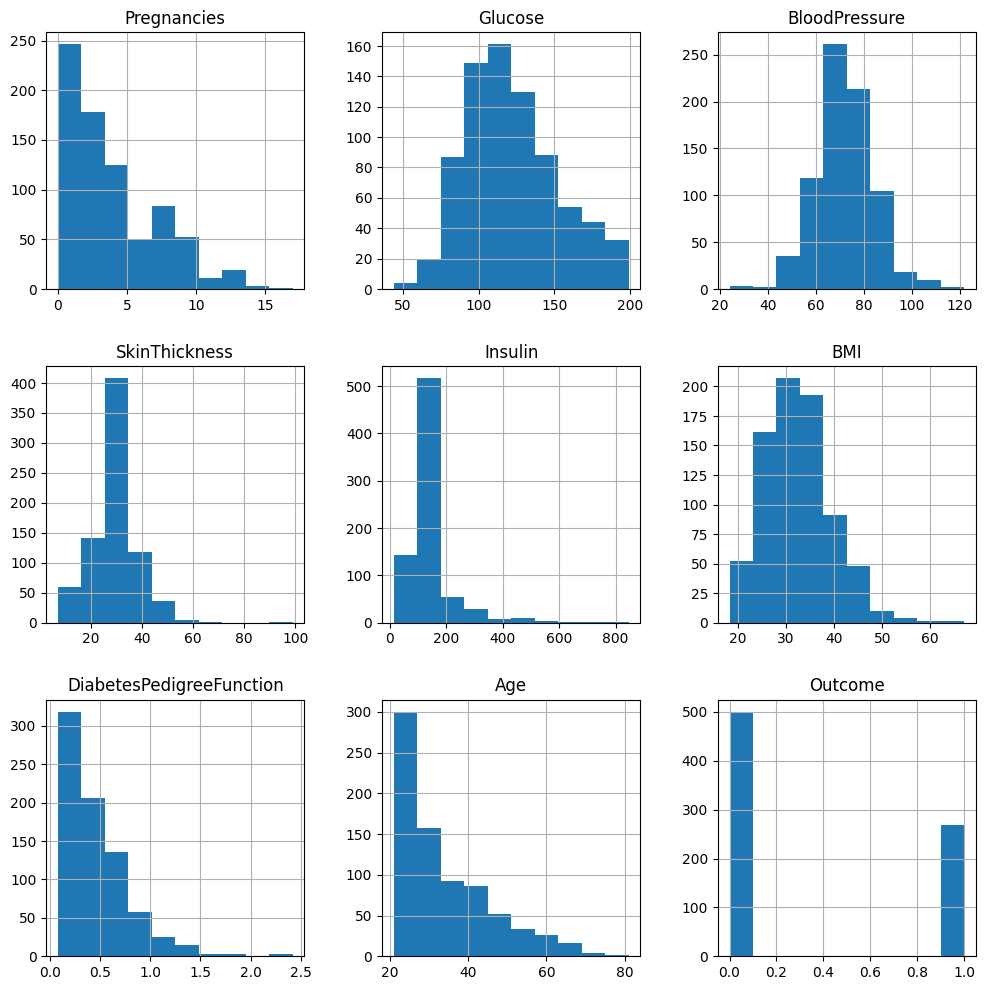

In [11]:
#after removing null values
plot = df_copy.hist(figsize = (12,12))

In [12]:
# Count of NANs after imputation
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Correlation between all the features

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

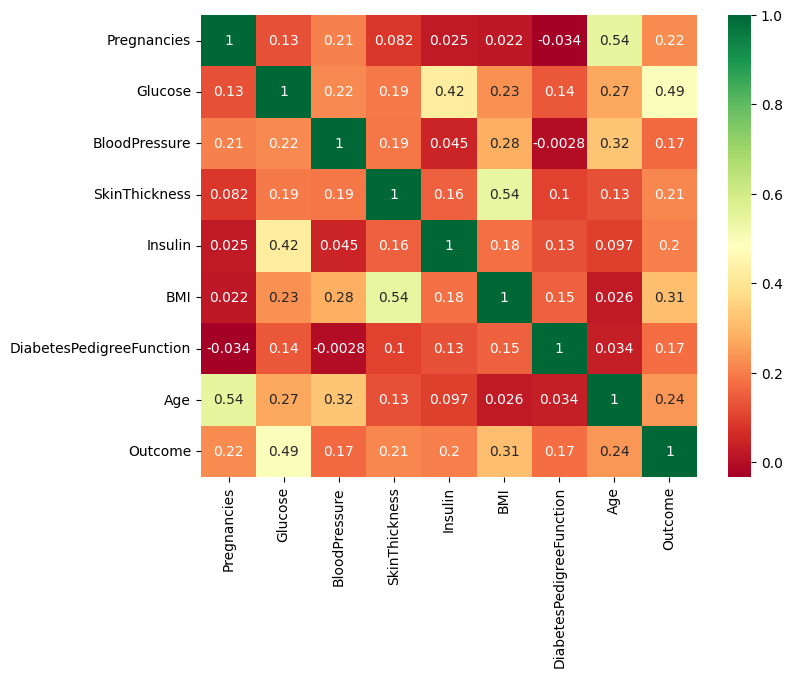

In [15]:
plt.figure(figsize=(8,6))
# seaborn method to showcase heatmap
p = sns.heatmap(df_copy.corr(), annot=True,cmap ='RdYlGn')

Removing Outliers

In [16]:
from sklearn.ensemble import IsolationForest

# fit the model to the data
model = IsolationForest()

# use the model to predict which rows are outliers
predictions = model.fit_predict(df_copy)

# select only the rows that are not outliers
df_copy = df_copy[predictions != -1]
df_copy.shape

(658, 9)

Target variable Analysis

In [17]:
#counts of the Outcomes
df_copy['Outcome'].value_counts()

0    454
1    204
Name: Outcome, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='Outcome', ylabel='count'>

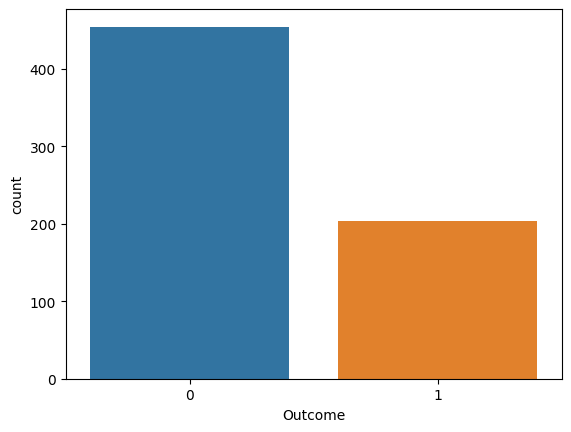

In [18]:
sns.countplot(x="Outcome", data=df_copy)     

Seperating data and labels

In [19]:
X = df_copy.drop(columns=['Outcome'])
y = df_copy['Outcome']

Train Test Split

In [20]:
train, test = np.split(df_copy.sample(frac=1),[int(0.8*len(df))])

<IPython.core.display.Javascript object>

Scaling and Oversampling

In [21]:
#Scaling and Oversampling function
def scale_dataset(df, oversample=False):
    X = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values

    #scaling features
    scalar = StandardScaler()
    X = scalar.fit_transform(X)

    #overlampling the minority class
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X,y)

    Data = np.hstack((X, np.reshape(y,(-1,1))))

    return Data, X, y   

In [33]:
Train, X_train, y_train = scale_dataset(train,oversample=True)
Test, X_test, y_test = scale_dataset(test,oversample=False)

Model Building

Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier 
random = RandomForestClassifier(max_depth=8)
random.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(random.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(random.score(X_test, y_test)))

#Displaying Cross-validayion scores
random_scores = cross_val_score(random, X, y,cv=KFold())
print("CV scores:",random_scores)
random_score = random_scores.mean()
print("Average CV score: {:.3f}".format(random_score))

Accuracy on training set: 0.954
Accuracy on test set: 0.773
CV scores: [0.75757576 0.6969697  0.79545455 0.85496183 0.76335878]
Average CV score: 0.774


K-Nearest Neighbors

In [24]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

#Displaying Cross-validation scores
knn_scores = cross_val_score(knn, X, y,cv=KFold())
print("CV scores:",knn_scores)
knn_score = knn_scores.mean()
print("Average CV score: {:.3f}".format(knn_score))

Accuracy on training set: 0.852
Accuracy on test set: 0.773
CV scores: [0.76515152 0.70454545 0.74242424 0.83969466 0.75572519]
Average CV score: 0.762


XGBoost

In [25]:
xg_model = xgb.XGBClassifier(max_depth=3)
xg_model.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(xg_model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(xg_model.score(X_test, y_test)))

#Displaying Cross-validation scores
xg_model_scores = cross_val_score(xg_model, X, y,cv=KFold())
print("CV scores:",xg_model_scores)
xg_model_score = xg_model_scores.mean()
print("Average CV score: {:.3f}".format(xg_model_score))

Accuracy on training set: 0.985
Accuracy on test set: 0.841
CV scores: [0.75       0.68181818 0.78030303 0.81679389 0.75572519]
Average CV score: 0.757


Logistic Regression

In [26]:
log = LogisticRegression(max_iter=250)
log.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(log.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(log.score(X_test, y_test)))

#Displaying Cross-validation scores
scores = cross_val_score(log, X, y,cv=KFold())
print("CV scores:",scores)
logScore = scores.mean()
print("Average CV score: {:.3f}".format(logScore))

Accuracy on training set: 0.764
Accuracy on test set: 0.727
CV scores: [0.78030303 0.74242424 0.76515152 0.85496183 0.79389313]
Average CV score: 0.787


In [27]:
from sklearn.svm import SVC

SVC = SVC()

SVC.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(SVC.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(SVC.score(X_test, y_test)))

#Displaying Cross-validation scores
scores = cross_val_score(SVC, X, y,cv=KFold())
print("CV scores:",scores)
SVCScore = scores.mean()
print("Average CV score: {:.3f}".format(SVCScore))


Accuracy on training set: 0.848
Accuracy on test set: 0.750
CV scores: [0.76515152 0.71969697 0.76515152 0.82442748 0.77099237]
Average CV score: 0.769


Cross Validation for each model

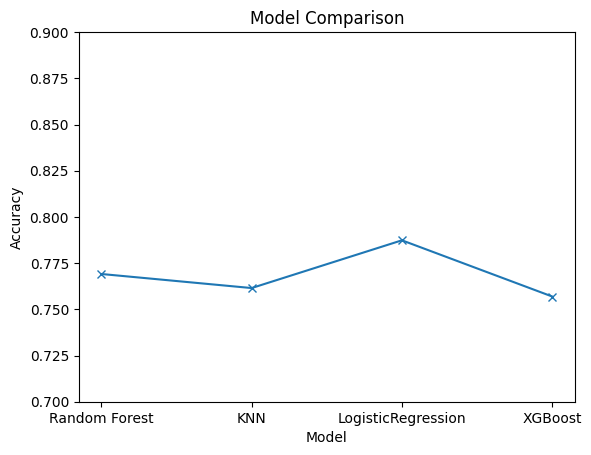

In [31]:
models = [random,knn,log,xg_model]
means = []
for model in models:
    kfold = KFold(n_splits=5)
    scores = cross_val_score(model, X, y, cv=kfold)
    means.append(scores.mean())
   
labels = ["Random Forest", "KNN", "LogisticRegression","XGBoost"]
plt.plot(labels,means, marker='x')
plt.ylim(0.7,0.9)
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()

In [29]:
pred_values = pd.DataFrame({
    'Model': ["Random Forest", "KNN", "LogisticRegression","XGBoost"],
    'Score': [random_score, knn_score, logScore, xg_model_score]})
pred_values.sort_values(by='Score', ascending=False)

,Model,Score
2,LogisticRegression,0.787347
0,Random Forest,0.773664
1,KNN,0.761508
3,XGBoost,0.756928


Using GridSearchCV

In [48]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [3,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [53]:
Data, X, y = scale_dataset(df_copy)

In [56]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
best_scores = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best_scores

,model,best_score,best_params
0,svm,0.778163,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.772068,{'n_estimators': 10}
2,logistic_regression,0.785774,{'C': 1}


Classification report for Random Forest model

In [29]:
#Selecting the Random Forest
y_pred = random.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.67      0.57      0.62        14

    accuracy                           0.72        36
   macro avg       0.71      0.69      0.70        36
weighted avg       0.72      0.72      0.72        36



Feature Importance by Random Forest

In [30]:
importances = pd.DataFrame({'Feature':X.columns,'Importance':np.round(random.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)

importances

,Feature,Importance
1,Glucose,0.273
5,BMI,0.156
7,Age,0.150
4,Insulin,0.100
6,DiabetesPedigreeFunction,0.096
3,SkinThickness,0.091
0,Pregnancies,0.069
2,BloodPressure,0.066


<AxesSubplot: >

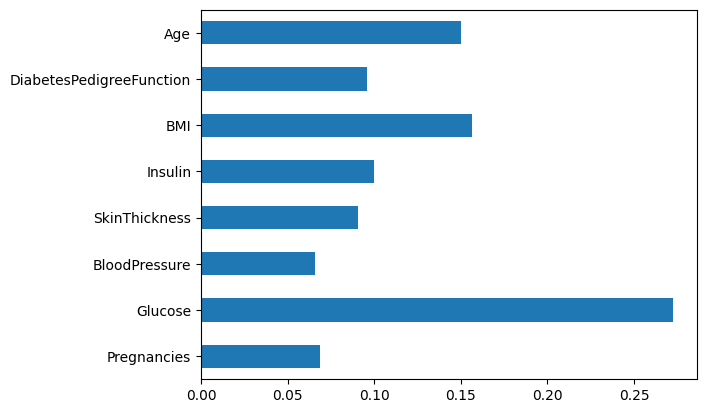

In [31]:
pd.Series(random.feature_importances_, index=X.columns).plot(kind='barh')

Saving the Random Forest Model

In [32]:
import pickle

#dump() function to save the model using pickle
saved_model = pickle.dumps(random)

#loading that saved model
RFC_model = pickle.loads(saved_model)

pickle.dump(random, open('diabetes.pkl', 'wb'))

#make predictions using the saved model
RFC_model.predict(X_test)

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

Predicting the Outcome for a specific paitient

In [34]:
# 1 = Diabetic
# 0 = Non Diabetic
prediction = random.predict([[0,137,40,35,168,43.1,2.228,33]])

diabetic_type = np.array(['Non-Diabetic','Diabetic'])
print(diabetic_type[prediction])

['Diabetic']
